In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

2023-11-16 06:04:06.350431: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 06:04:06.367643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 06:04:06.367661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 06:04:06.368136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 06:04:06.371273: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-16 06:04:06.371611: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
data = pd.read_csv('SalesData.csv');

In [3]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
x_train = data['Temperature']
y_train = data['Revenue']

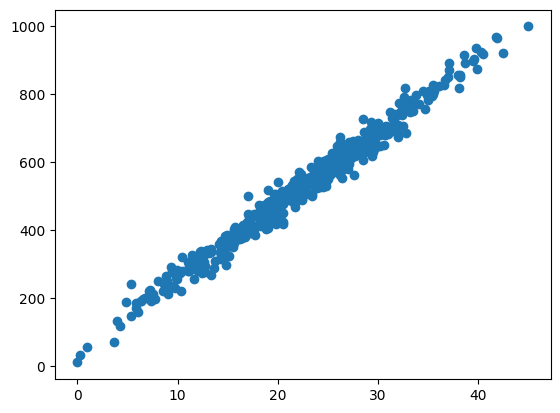

In [6]:
plt.scatter(x_train,y_train)

In [7]:
model = tf.keras.Sequential();
model.add(tf.keras.layers.Dense(units=1,input_shape=[1]));

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error');

In [10]:
epoch_hist = model.fit(x_train, y_train,epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 835us/step - loss: 274811.3750
Epoch 2/1000
16/16 [==============================] - 0s 729us/step - loss: 235369.3438
Epoch 3/1000
16/16 [==============================] - 0s 684us/step - loss: 200587.2969
Epoch 4/1000
16/16 [==============================] - 0s 661us/step - loss: 169331.7812
Epoch 5/1000
16/16 [==============================] - 0s 635us/step - loss: 142321.4688
Epoch 6/1000
16/16 [==============================] - 0s 619us/step - loss: 118092.4844
Epoch 7/1000
16/16 [==============================] - 0s 534us/step - loss: 97932.2266
Epoch 8/1000
16/16 [==============================] - 0s 512us/step - loss: 80362.0312
Epoch 9/1000
16/16 [==============================] - 0s 511us/step - loss: 65453.4766
Epoch 10/1000
16/16 [==============================] - 0s 514us/step - loss: 52888.8945
Epoch 11/1000
16/16 [==============================] - 0s 521us/step - loss: 42396.8477
Epoch 12/1000
16/16 [==============

In [11]:
model.get_weights()

[array([[21.47609]], dtype=float32), array([44.840607], dtype=float32)]

In [12]:
losses = epoch_hist.history['loss']

Text(0.5, 0, 'Epoch')

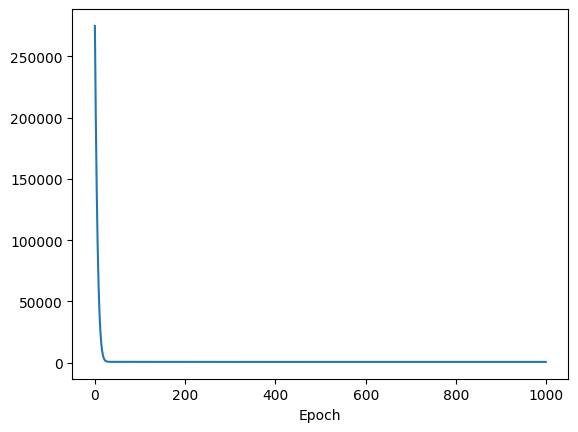

In [13]:
plt.plot(losses)
plt.xlabel('Epoch')